In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import math
from sklearn import metrics

In [2]:
#Importing data
data = pd.read_csv('../data/training_noemoticon.csv', header=None, encoding='latin-1')
data = data.to_numpy()

In [3]:
#Function to preprocess the input x, for removing special characters and splitting the entire string
#Also converts the entire text to lower case.
def process(x):
    l = []
    for i in x:
        t = (re.split('\s*[@.!:/%;,\s?\-]\s*', i))
        prime = []
        for j in t:
            if(j==''):
                continue
            prime.append(j.lower())
        l.append(prime)
    return l

In [4]:
#Segregating input data on the basis of their actual classes.

index_0 = np.argwhere(data[:,0]==0)[:,0]
index_1 = np.argwhere(data[:,0]==4)[:,0]

x_0 = data[index_0, 5]
y_0 = data[index_0, 0].reshape(-1,1)
count_0 = index_0.shape[0]

x_1 = data[index_1, 5]
y_1 = data[index_1, 0].reshape(-1,1)
count_1 = index_1.shape[0]

p_0 = np.log(count_0) - np.log(count_0 + count_1)
p_1 = np.log(count_1) - np.log(count_0 + count_1)

x_0 = process(x_0)
x_1 = process(x_1)

In [5]:
#Creating three diferent dictonaries, two for each classes and one for union of two
def add_dict(x_0, x_1):
    dict_t = {}
    dict_0 = {}
    dict_1 = {}
    for i in x_0:
        for j in i:
            if(j in dict_0):
                dict_0[j] = dict_0.get(j) + 1
            else:
                dict_0[j] = 1
            
            if(j in dict_t):
                dict_t[j] = dict_t.get(j) + 1
            else:
                dict_t[j] = 1
                
    
    
    for i in x_1:
        for j in i:
            if(j in dict_1):
                dict_1[j] = dict_1.get(j) + 1
            else:
                dict_1[j] = 1
            
            if(j in dict_t):
                dict_t[j] = dict_t.get(j) + 1
            else:
                dict_t[j] = 1
                
    return dict_t, dict_0, dict_1

dict_t, dict_0, dict_1 = add_dict(x_0, x_1)

In [6]:
#Total no of features, and their count in respective classes
no_of_words = len(dict_t)
total_words_0 = sum(dict_0.values())
total_words_1 = sum(dict_1.values())
c = 1

In [7]:
#Importing test data
test = pd.read_csv('../data/test.csv', header=None, encoding='latin-1')
test = test.to_numpy()

In [8]:
#Segregating test data on the bases of their class, and taking only class 0 and 4
index_t = np.union1d(np.argwhere(test[:,0]==0)[:,0], np.argwhere(test[:,0]==4)[:,0])
x_test = test[index_t, 5]
y_test = test[index_t, 0].reshape(-1,1)
x_test = process(x_test)

In [18]:
#Function to predict classes, and calculate accuracy of prediction.
#returns confusion matrix and scores of prediction as well
def accuracy(y, x):
    confusion = np.zeros([2,2])
    pred = []
    rand_pred = []
    scores = []
    for i in range(len(x)):
        p0 = p_0
        p1 = p_1
        rand = np.random.rand()
        for j in x[i]:
            if(j in dict_0):
                p0 += np.log((dict_0[j]+1)) - np.log((total_words_0 + no_of_words*c))
            else:
                p0 += np.log(1) - np.log((total_words_0 + no_of_words*c))
                
            
            if(j in dict_1):
                p1 += np.log((dict_1[j]+1)) - np.log((total_words_1 + no_of_words*c))
            else:
                p1 += np.log(1) - np.log((total_words_1 + no_of_words*c))
          
        scores.append(np.exp(p1)/(np.exp(p0)+np.exp(p1)))
        if(p1>p0):
            pred.append(4)
        else:
            pred.append(0)
            
        if(rand>0.5):
            rand_pred.append(4)
        else:
            rand_pred.append(0)
    
    total = len(pred)
    count_real = 0
    count_random = 0
    
    print(total)
    
    for i in range(len(pred)):
        if(pred[i]==y[i][0]):
            count_real += 1
            if(y[i][0]==0):
                confusion[0,0] += 1
            else:
                confusion[1,1] += 1
        else:
            if(y[i][0]==0):
                confusion[1,0] += 1
            else:
                confusion[0,1] += 1
        
        if(rand_pred[i]==y[i][0]):
            count_random += 1
                
    print(count_real, count_random)
    
    return count_real, count_random, total, confusion, scores

In [10]:
#Accuracy over the training set
count_real, count_random, total, confusion, scores = accuracy(np.concatenate((y_0, y_1), axis=0), np.concatenate((x_0, x_1), axis=0))
print("Accuracy of the model over training set is: ", count_real*100/total)

/home/cs5170415/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


1600000
1335289 800236
Accuracy of the model over training set is:  83.4555625


In [19]:
#Accuracy over the test set
count_real_test, count_random_test, total_test, confusion_test, scores_test = accuracy(y_test, x_test)
print("Accuracy of the model over test set is: ", count_real_test*100/total_test)

359
292 185
Accuracy of the model over test set is:  81.33704735376044


In [20]:
#Random prediction and Majority Prediction
print("Random prediction accuracy of the model over test set is: ", count_random_test*100/total_test)

majority_pred = -1
if(count_1 > count_0):
    majority_pred = 1
else:
    majority_pred = 0

count_majority_pred = confusion_test[majority_pred][0] + confusion_test[majority_pred][1]

print("Majority prediction accuracy of the model over test set is: ", count_majority_pred*100/total_test)

Random prediction accuracy of the model over test set is:  51.532033426183844
Majority prediction accuracy of the model over test set is:  51.25348189415042


In [21]:
#Confusion matrix of test set
print("Confusion Matrix for test set is:\n", confusion_test)

Confusion Matrix for test set is:
 [[147.  37.]
 [ 30. 145.]]


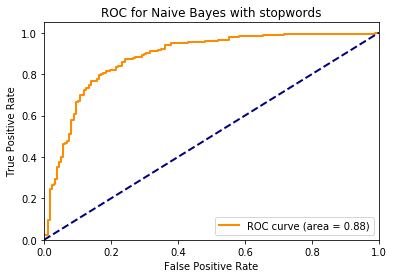

In [22]:
#Drawing ROC Curve on the basis of scores of prediction, with stopwords

fpr, tpr, thresholds = metrics.roc_curve(np.asarray(y_test.flatten(), dtype=np.int64), scores_test, pos_label=4)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Naive Bayes with stopwords')
plt.legend(loc="lower right")
plt.show()